In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
label = le.fit_transform(data['State'])
label

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [7]:
le.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [8]:
new_data = data

In [9]:
data.head(6)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12


In [10]:
data = new_data.drop("State",axis='columns')
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [11]:
data['state'] = label

In [12]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,state
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


In [13]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [14]:
data.values

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.9226183e+05,
        2.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.9179206e+05,
        0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.9105039e+05,
        1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.8290199e+05,
        2.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.6618794e+05,
        1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.5699112e+05,
        2.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.5612251e+05,
        0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.5575260e+05,
        1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 1.5221177e+05,
        2.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 1.4975996e+05,
        0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 1.4612195e+05,
        1.00

In [15]:
array = data.values
scaler = MinMaxScaler(feature_range = (0,1))
rescaledx = scaler. fit_transform (array)
set_printoptions(precision=2)
print(rescaledx[0:5,:])

[[1.   0.65 1.   1.   1.  ]
 [0.98 0.76 0.94 1.   0.  ]
 [0.93 0.38 0.86 0.99 0.5 ]
 [0.87 0.51 0.81 0.95 1.  ]
 [0.86 0.31 0.78 0.85 0.5 ]]


array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>],
       [<AxesSubplot:title={'center':'state'}>, <AxesSubplot:>]],
      dtype=object)

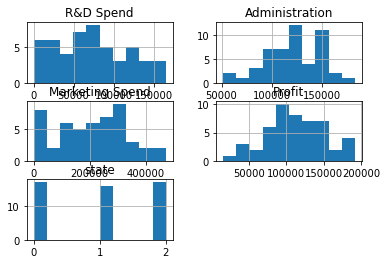

In [16]:
data.hist()

<AxesSubplot:>

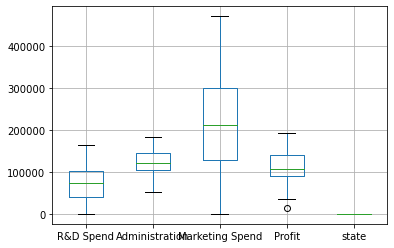

In [17]:
data.boxplot()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   state            50 non-null     int32  
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [19]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
state              0
dtype: int64

# correlation

In [20]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,state
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.104685
Administration,0.241955,1.000000,-0.032154,0.200717,0.011847
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.077670
Profit,0.972900,0.200717,0.747766,1.000000,0.101796
state,0.104685,0.011847,0.077670,0.101796,1.000000


# scatter plot

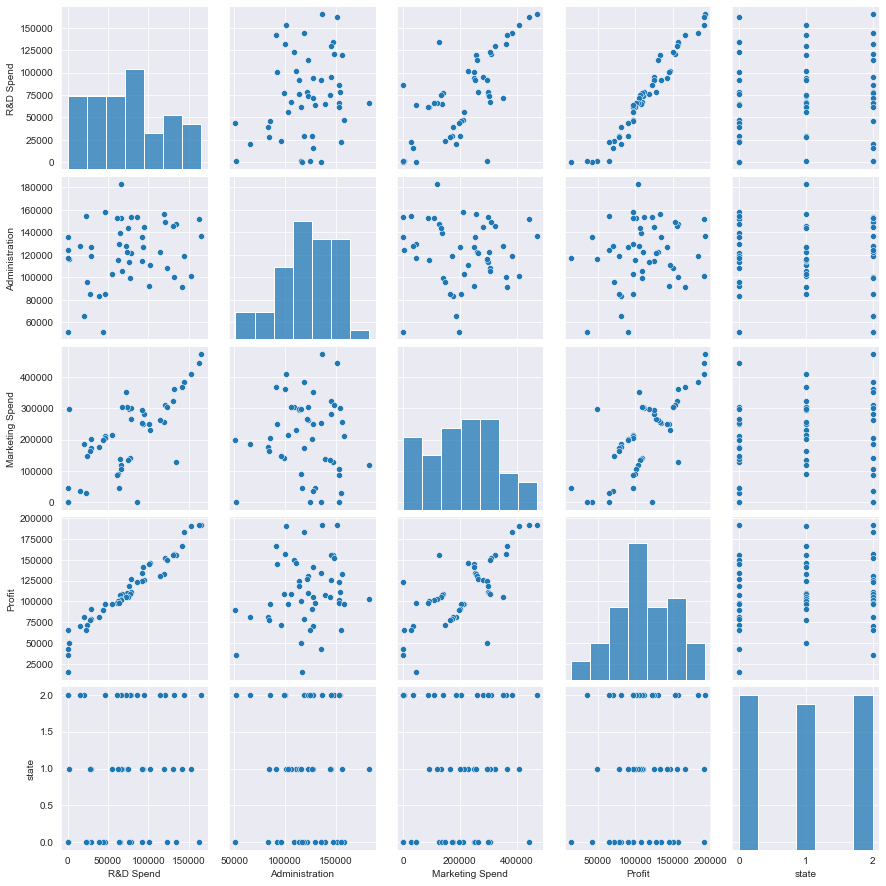

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [22]:
data = data.rename({'R&D Spend':'rands','Administration':'admin','Marketing Spend':'mars','Profit':'profit','State':'state'},axis=1)

In [23]:
data.head()

,rands,admin,mars,profit,state
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


# preparing models

In [24]:
import statsmodels.formula.api as smf
model = smf.ols('profit~rands+admin+mars+state',data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           8.51e-29
Time:                        21:07:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
rands          0.8058      0.046     17.609      0.000       0.714       0.898
admin         -0.0268      0.052     -0.520      0.606      -0.131       0.077
mars           0.0272      0.017      1.637      0.109      -0.006       0.061
state        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model.tvalues,model.pvalues

(Intercept     7.368962
 rands        17.608621
 admin        -0.519906
 mars          1.636966
 state        -0.013865
 dtype: float64,
 Intercept    2.900008e-09
 rands        8.249206e-22
 admin        6.056771e-01
 mars         1.086131e-01
 state        9.889988e-01
 dtype: float64)

In [26]:
model.rsquared,model.rsquared_adj

(0.9507462044842656, 0.9463680893273114)

# calculating vif

In [27]:
rsq_a = smf.ols('rands~admin+mars+state',data=data).fit().rsquared
vif_a = 1/(1-rsq_a)
rsq_b = smf.ols('admin~rands+mars+state',data=data).fit().rsquared
vif_b = 1/(1-rsq_b)
rsq_c = smf.ols('mars~rands+admin+state',data=data).fit().rsquared
vif_c = 1/(1-rsq_c)
rsq_d = smf.ols('state~rands+admin+mars',data=data).fit().rsquared
vif_d = 1/(1-rsq_d)

d1 = {'Variables':['state','rands','mars','admini'],'VIF':[vif_a,vif_b,vif_c,vif_d]}
Vif_frame = pd.DataFrame(d1)
Vif_frame


,Variables,VIF
0,state,2.481178
1,rands,1.175315
2,mars,2.326780
3,admini,1.011281


# QQ plots

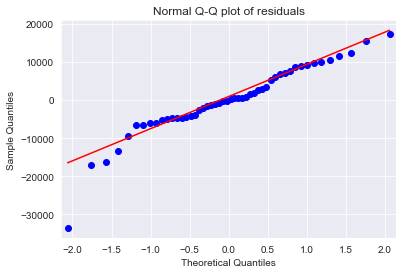

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
np.where(model.resid>10)

(array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64),)

# scatter plot

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

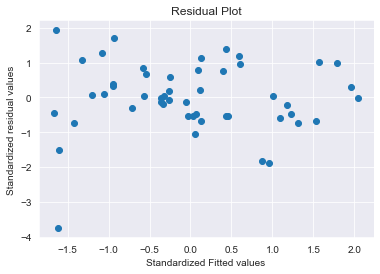

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# residual vs regressors

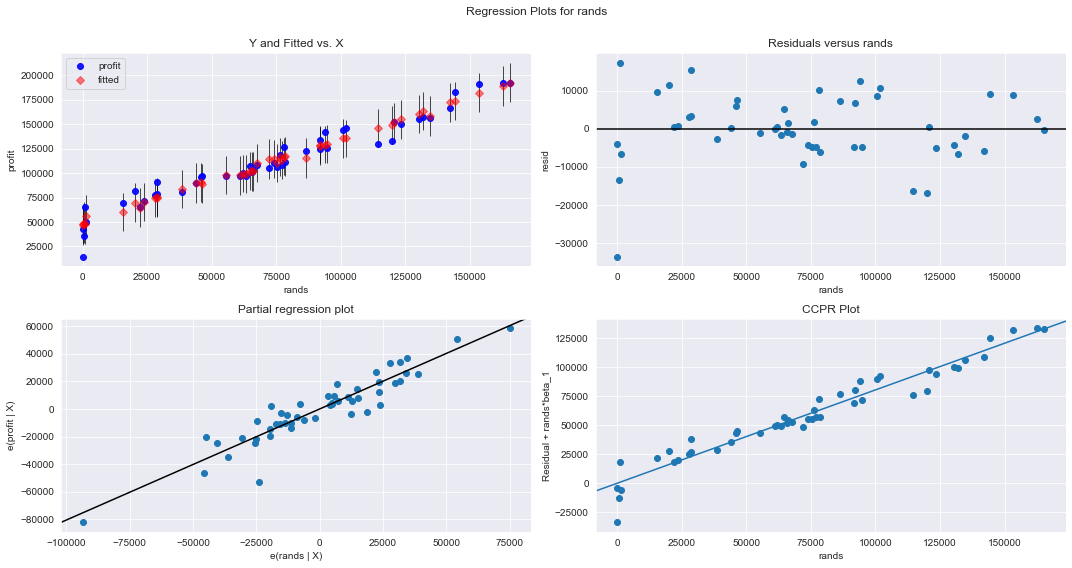

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rands", fig=fig)
plt.show()

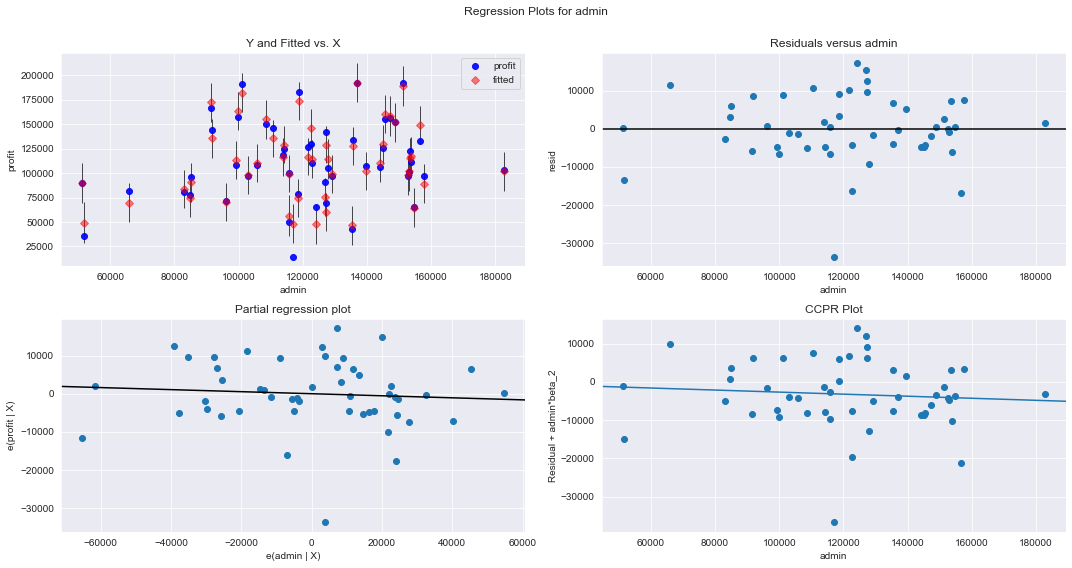

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

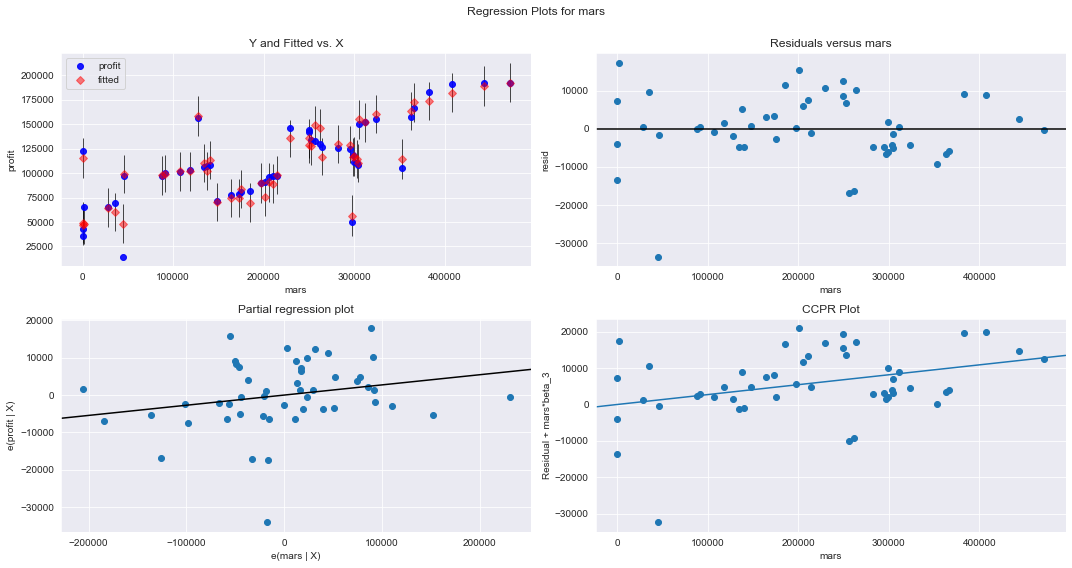

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "mars", fig=fig)
plt.show()

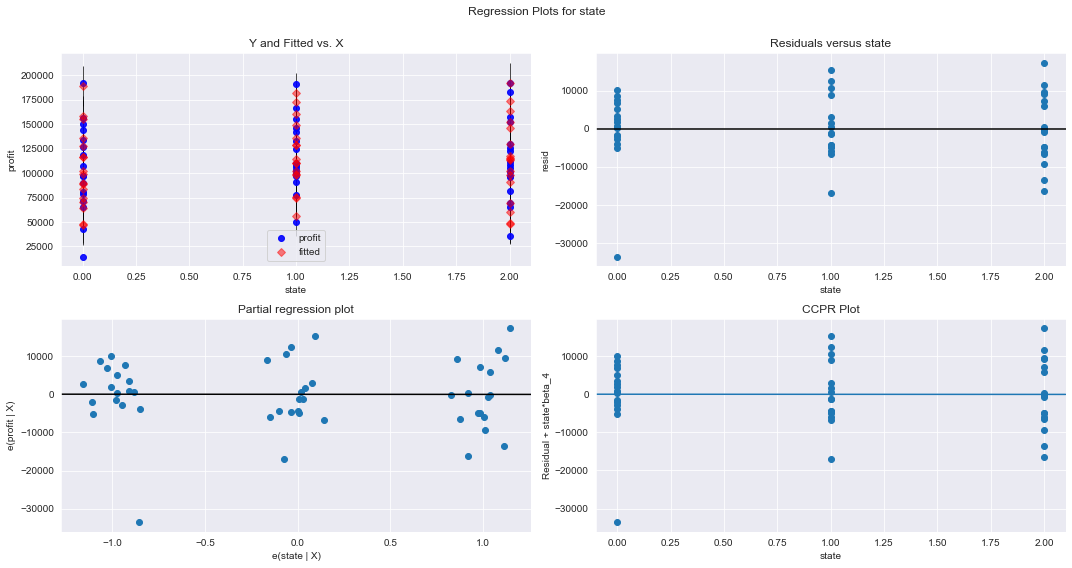

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "state", fig=fig)
plt.show()

# cooks distance

In [36]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

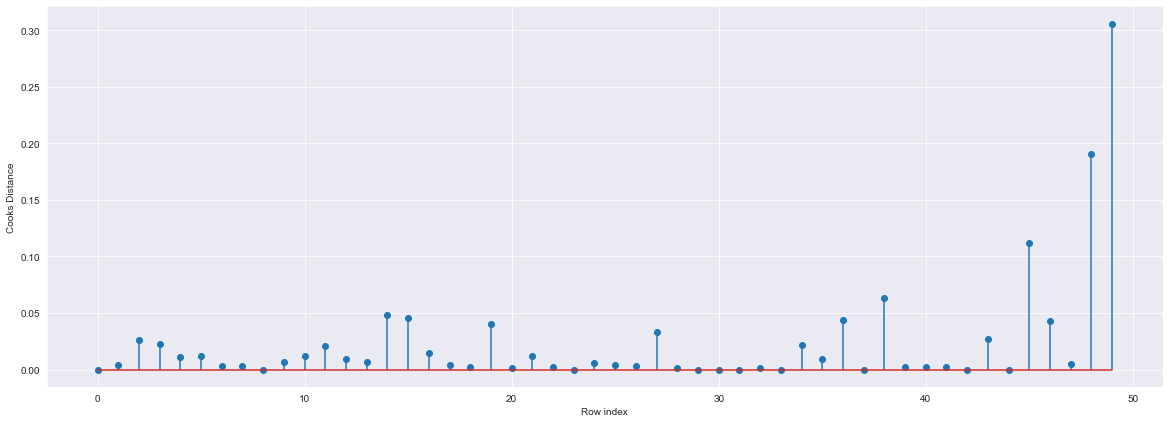

In [37]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()


In [38]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

# High Influence points

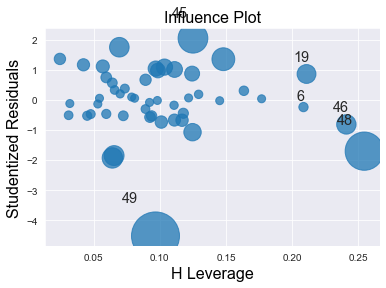

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()


In [40]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)


In [41]:
data[data.index.isin([48, 49])]

,rands,admin,mars,profit,state
48,542.05,51743.15,0.00,35673.41,2
49,0.00,116983.80,45173.06,14681.40,0


In [42]:
data.head()

,rands,admin,mars,profit,state
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1


# improving model

In [43]:
new_data = pd.read_csv("C:\\Users\\DELL\\Downloads\\50_Startups.csv")
data1=new_data.drop(new_data.index[[48,49]],axis=0).reset_index()
data1=data1.drop(['index'],axis=1)
data1.shape

(48, 5)

# model build

In [44]:
final_ml_p = smf.ols('profit~rands+admin+mars',data=data).fit()
(final_ml_p.rsquared,final_ml_p.aic)

(0.9507459940683246, 1058.7714985998055)

# predicting new data

In [45]:
new_data1 = pd.DataFrame({'rands':50,'mars':100,'admin':150},index=[1])
final_ml_p.predict(new_data1)

1    50161.179154
dtype: float64

In [46]:
final_ml_p.predict(data.iloc[0:5,])


0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

In [47]:
pred_y = final_ml_p.predict(data)
pred_y.head()


0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

# rmse

In [48]:
import numpy as np
np.sqrt(np.mean(data.profit-pred_y)**2)

7.625203579664231e-11